In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("./articulos_ml.csv")
data.shape
filtered_data = data[(data['Word count'] <= 35000) & (data['# Shares'] <= 80000)]

In [3]:
suma = (filtered_data['# of Links'] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values
regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)
z_pred = regr2.predict(XY_train)
print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
print('Variance score:%2f' % r2_score(z_train, z_pred))


Coefficients: 
 [   3.78192735 -508.3979127 ]
Mean squared error: 358158876.48
Variance score:0.075180


Text(0.5, 0.92, 'Regresion Lineal con Multiples Variables')

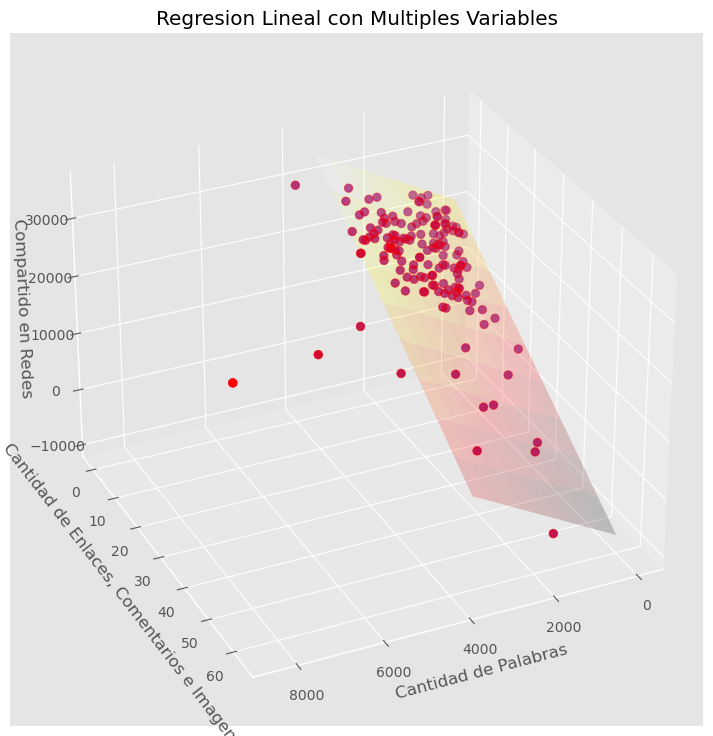

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)
z = (nuevoX + nuevoY + regr2.intercept_)
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
ax.scatter(XY_train[:, 0], XY_train[:, 1] , z_pred, c='blue', s=30)
ax.scatter(XY_train[:, 0], XY_train[:, 1] , z_pred, c='red', s=40)
ax.view_init(elev=30., azim=65)
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces, Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresion Lineal con Multiples Variables')

In [17]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil[0]))

18859
